# Latihan dengan reflector

In [1]:
import openmc
%matplotlib inline

In [2]:
# weight fraction "wo"
Pu = openmc.Material(name='Plutonium')
Pu.add_nuclide("Pu239", 1.0, "wo")
Pu.set_density("g/cc", 15.8)

Uranium = openmc.Material(name='Uranium')
Uranium.add_nuclide("U238", 0.992745, "wo")
Uranium.add_nuclide("U235", 0.007200, "wo")
Uranium.set_density("g/cc", 18.8)

materials = openmc.Materials([Pu, Uranium])
materials.export_to_xml()

material_colors = {
    Pu : 'red',
    Uranium : 'orange'
}

# !cat materials.xml

In [4]:
Pu_cylinder = openmc.ZCylinder(r=4.935)
U_reflector = openmc.ZCylinder(r=9.935, boundary_type='vacuum')
tinggi = openmc.ZPlane(z0=6.909)
alas = openmc.ZPlane(z0=0)


pu = openmc.Cell(fill=Pu, region=(-Pu_cylinder & +alas & -tinggi))
reflector = openmc.Cell(fill=Uranium, region=(+Pu_cylinder & -U_reflector & +alas & -tinggi))
void = openmc.Cell(region=(+U_reflector | +tinggi | -alas))

geom = openmc.Geometry([pu, reflector, void])
# geom.plot(basis='xz')
# geom.plot(basis='xy')
# geom.plot(basis='yz')
# geom.export_to_xml()

# !cat geometry.xml

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

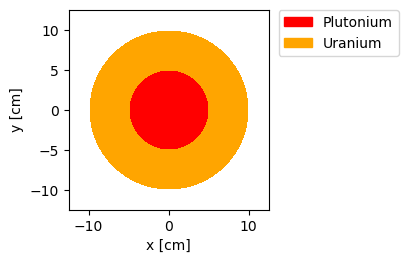

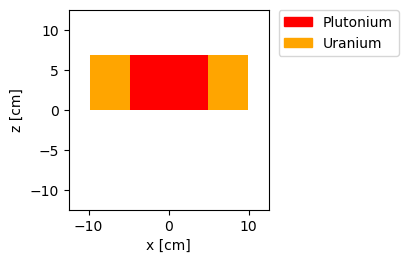

In [13]:
geom.plot(basis='xy', width=(25,25), origin=(0,0,1), color_by=('material'), colors=material_colors, legend= True)
geom.plot(basis='xz', width=(25,25), origin=(0,0,0), color_by=('material'), colors=material_colors, legend= True)

In [54]:
# Pengaturan simulasi
settings = openmc.Settings()
settings.particles = 5000         # Jumlah neutron per generasi
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

# Posisi sumber neutron
source = openmc.Source()
source.space = openmc.stats.Point((3.5, 0, 0))  
settings.source = source

settings.export_to_xml()

# Run
openmc.run()

/home/dhiyasalmas/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:656: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################